## KL-Divergence and Cross Entropy

In this section we dive into how the **cross-entropy loss** is equivalent to the **negative log-likelihood**.

### The Machine Learning Problem

**The Goal:**
In machine learning, we want our model's predicted distribution $p(y|\theta)$ to match the **true underlying distribution** of the data. 

**The Challenge:**
We don't know the true distribution! All we have are observed samples: $\{y_1, y_2, ..., y_N\}$

**The Solution:**
We construct an **empirical distribution** from our observed data that serves as our best estimate of the true distribution. Then we use KL divergence to measure how far our model is from this empirical estimate.

---
---

### KL Divergence: Measuring Distribution Distance

**Definition:**
The **Kullback-Leibler (KL) divergence** measures the "distance" between two probability distributions. It is also known as **Relative Entropy**.

**Key Definitions:**
- $q(y)$ = Empirical distribution (our best estimate from observed samples)
- $p(y|\theta)$ = Model distribution (what our neural network predicts)

#### Discrete Case (for classification):
$$\boxed{
D_{KL}(q \| p) = \sum_{y} q(y) \log\left(\frac{q(y)}{p(y)}\right) = \sum_{y} q(y) \log q(y) - \sum_{y} q(y) \log p(y)
}$$

#### Continuous Case (for regression):
$$\boxed{
D_{KL}(q \| p) = \int_{-\infty}^{\infty} q(y) \log\left(\frac{q(y)}{p(y)}\right) dy = \int_{-\infty}^{\infty} q(y) \log q(y)\, dy - \int_{-\infty}^{\infty} q(y) \log p(y)\, dy
}$$

#### Expected Value Form:
$$\boxed{
D_{KL}(q \| p) = \mathbb{E}_{y \sim q}\left[\log\frac{q(y)}{p(y)}\right]
}$$

---
---

### Intuition Behind KL Divergence



The KL Divergence measures **how far off** distribution $p$ is from $q$. Think of it as a "distance" metric, though it's not symmetric (direction matters).

**Key Insights:**

**1. Zero Divergence = Perfect Match**
- When $p(x) = q(x)$ everywhere, then $D_{KL}(q \| p) = 0$
- This means our model perfectly captures the true distribution

**2. Larger Divergence = Worse Approximation**
- The further $p$ strays from $q$, the larger the KL divergence
- A model that assigns low probability to high-probability regions of $q$ is penalized heavily

**3. Why the Log Ratio?**
- $\log\left(\frac{q(x)}{p(x)}\right)$ is large and positive when $q(x) > p(x)$ (we're underestimating)
- $\log\left(\frac{q(x)}{p(x)}\right)$ is large and negative when $q(x) < p(x)$ (we're overestimating)
- Multiplying by $q(x)$ weights these errors by their importance in the true distribution

**4. Why It Matters for Deep Learning**
- During training, we want to minimize $D_{KL}(q_{empirical} \| p_{model})$
- This forces our neural network's output distribution to match the observed distribution
- In classification: $q$ is the one-hot encoded label, $p$ is the softmax output

**Visualization:** 
The graphs below show the **green area under the integrand curve** represents the total divergence. High divergence has a large green area; low divergence has a tiny one.

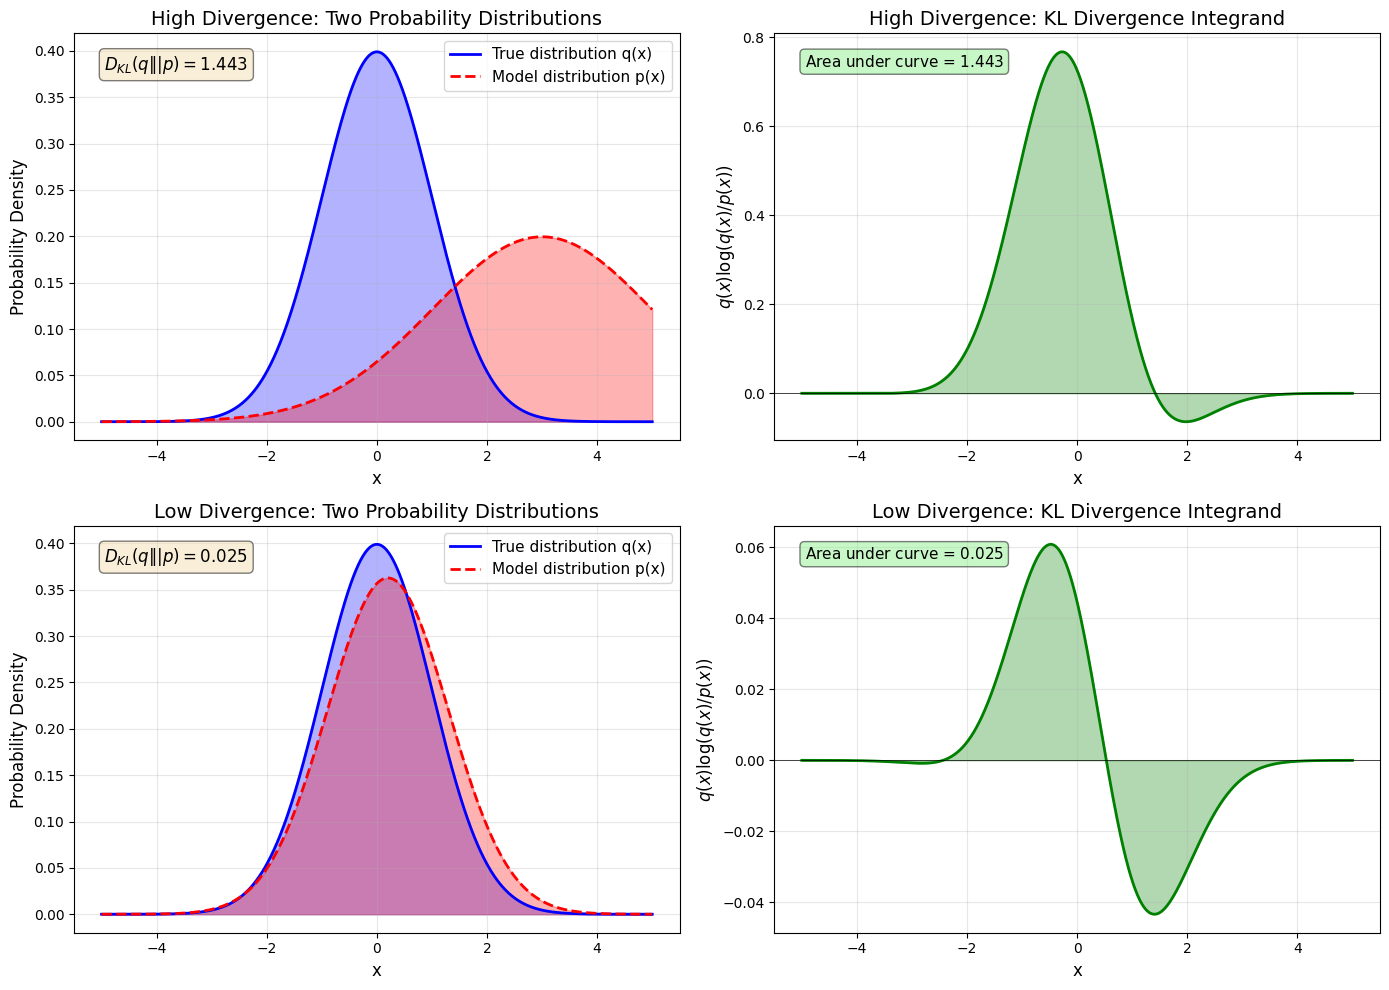

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define x values
x = np.linspace(-5, 5, 1000)

# Create figure with 2 rows (high divergence, low divergence) and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ============ HIGH DIVERGENCE ============
# True distribution q(x)
q_mean_high, q_std_high = 0, 1
q_high = norm.pdf(x, q_mean_high, q_std_high)

# Model distribution p(x) - very different
p_mean_high, p_std_high = 3, 2
p_high = norm.pdf(x, p_mean_high, p_std_high)

# Calculate KL divergence
kl_high = np.sum(q_high * np.log(q_high / (p_high + 1e-10)) * (x[1] - x[0]))

# Left plot: High divergence distributions
ax1 = axes[0, 0]
ax1.plot(x, q_high, 'b-', linewidth=2, label='True distribution q(x)')
ax1.plot(x, p_high, 'r--', linewidth=2, label='Model distribution p(x)')
ax1.fill_between(x, q_high, alpha=0.3, color='blue')
ax1.fill_between(x, p_high, alpha=0.3, color='red')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.set_title('High Divergence: Two Probability Distributions', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.text(0.05, 0.95, fr'$D_{{KL}}(q \|| p) = {kl_high:.3f}$', 
         transform=ax1.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Right plot: High divergence integrand
ax2 = axes[0, 1]
integrand_high = q_high * np.log(q_high / (p_high + 1e-10))
ax2.plot(x, integrand_high, 'g-', linewidth=2)
ax2.fill_between(x, integrand_high, alpha=0.3, color='green')
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel(r'$q(x) \log(q(x)/p(x))$', fontsize=12)
ax2.set_title('High Divergence: KL Divergence Integrand', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.text(0.05, 0.95, fr'Area under curve = ${kl_high:.3f}$', 
         transform=ax2.transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# ============ LOW DIVERGENCE ============
# True distribution q(x)
q_mean_low, q_std_low = 0, 1
q_low = norm.pdf(x, q_mean_low, q_std_low)

# Model distribution p(x) - very similar
p_mean_low, p_std_low = 0.2, 1.1
p_low = norm.pdf(x, p_mean_low, p_std_low)

# Calculate KL divergence
kl_low = np.sum(q_low * np.log(q_low / (p_low + 1e-10)) * (x[1] - x[0]))

# Left plot: Low divergence distributions
ax3 = axes[1, 0]
ax3.plot(x, q_low, 'b-', linewidth=2, label='True distribution q(x)')
ax3.plot(x, p_low, 'r--', linewidth=2, label='Model distribution p(x)')
ax3.fill_between(x, q_low, alpha=0.3, color='blue')
ax3.fill_between(x, p_low, alpha=0.3, color='red')
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('Probability Density', fontsize=12)
ax3.set_title('Low Divergence: Two Probability Distributions', fontsize=14)
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.text(0.05, 0.95, fr'$D_{{KL}}(q \|| p) = {kl_low:.3f}$', 
         transform=ax3.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Right plot: Low divergence integrand
ax4 = axes[1, 1]
integrand_low = q_low * np.log(q_low / (p_low + 1e-10))
ax4.plot(x, integrand_low, 'g-', linewidth=2)
ax4.fill_between(x, integrand_low, alpha=0.3, color='green')
ax4.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax4.set_xlabel('x', fontsize=12)
ax4.set_ylabel(r'$q(x) \log(q(x)/p(x))$', fontsize=12)
ax4.set_title('Low Divergence: KL Divergence Integrand', fontsize=14)
ax4.grid(True, alpha=0.3)
ax4.text(0.05, 0.95, fr'Area under curve = ${kl_low:.3f}$', 
         transform=ax4.transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

### Properties of KL Divergence

#### Non-negativity

$$D_{KL}(q \| p) \geq 0$$

with equality if and only if $q = p$ almost everywhere.

**Proof:**
$$
\begin{align} 
D_{KL}(q \| p) &= \int q(y)\log\left[\frac{q(y)}{p(y)}\right]dy \\
&= - \int q(y)\log\left[\frac{p(y)}{q(y)}\right]dy \\
&\geq - \int q(y)\left(\frac{p(y)}{q(y)} - 1\right)dy \quad \text{(by } \log(x) \leq x-1\text{)} \\ 
&= - \int q(y)\frac{p(y)}{q(y)}dy + \int q(y)dy \\
&= -\int p(y)dy + \int q(y)dy \\
&= -1 + 1 = 0
\end{align}
$$

---

#### Asymmetry

$$D_{KL}(q \| p) \neq D_{KL}(p \| q) \quad \text{(in general)}$$

KL divergence is **not symmetric** — the direction matters!

**Proof by Counterexample:**

Let:
- $q \sim \mathcal{N}(0, 1)$
- $p \sim \mathcal{N}(0, 4)$ (same mean, different variance)

For Gaussian distributions, there's a **closed-form KL divergence**:
$$D_{KL}(\mathcal{N}(\mu_1, \sigma_1^2) \| \mathcal{N}(\mu_2, \sigma_2^2)) = \log\frac{\sigma_2}{\sigma_1} + \frac{\sigma_1^2 + (\mu_1 - \mu_2)^2}{2\sigma_2^2} - \frac{1}{2}$$

**Forward direction:**
$$D_{KL}(q \| p) = D_{KL}(\mathcal{N}(0,1) \| \mathcal{N}(0,4)) = \log\frac{2}{1} + \frac{1 + 0}{2(4)} - \frac{1}{2} = \log 2 + \frac{1}{8} - \frac{1}{2} \approx 0.318$$

**Reverse direction:**
$$D_{KL}(p \| q) = D_{KL}(\mathcal{N}(0,4) \| \mathcal{N}(0,1)) = \log\frac{1}{2} + \frac{4 + 0}{2(1)} - \frac{1}{2} = -\log 2 + 2 - \frac{1}{2} \approx 0.807$$

**Conclusion:**
$$D_{KL}(q \| p) = 0.318 \neq 0.807 = D_{KL}(p \| q)$$

Therefore, KL divergence is **not symmetric** $\blacksquare$

---
---


### Constructing the Empirical Distribution

**Question:** How do we create a valid empirical distribution when we only have samples?

**Answer:** We use the **Dirac delta function**:

$$
\boxed{q(y) = \frac{1}{N}\sum_{i=1}^N \delta\left[y - y_i\right]}
$$

**What is this?**
- $\delta[y - y_i]$ is the **Dirac delta function**: zero everywhere except at $y = y_i$, where it "spikes" with area 1
- This creates a **Point Mass Distribution** — all probability mass is concentrated exactly at the observed data points
- The factor $\frac{1}{N}$ ensures the distribution integrates to 1 (valid probability distribution)

**Why is this a good empirical distribution?**
- It only represents **what we know** (the observed samples), nothing more
- No assumptions about the shape of the true distribution
- In classification, this becomes a **one-hot encoded vector**: $q(y=y_i) = 1$, $q(y \neq y_i) = 0$

**Why Can We Trust This Approach?**

**Law of Large Numbers:**
As the number of samples $N$ increases, this empirical distribution becomes a better approximation of the true underlying distribution.

**Key Insight:**
- With enough data, our observed samples accurately represent the true distribution
- We don't need to assume any specific distribution family (normal, uniform, etc.)
- This works for **any** type of data: categorical (classification), continuous (regression), etc.
  
---
---


<div align="center">
<img src="../../images/chap4/direacDelta.png" width="900" />
</div>

### Deriving the Cross Entropy Loss

**Starting Point:**

$\text{Let our empirical distribution (from observed data) be:}$
$$q(y) = \frac{1}{N}\sum_{i=1}^N \delta\left[y - y_i\right]$$

$\text{Let our model's predicted distribution be:}$
$$p(y | \theta)$$

---

**Step 1: Start with KL Divergence**

We want to find parameters $\theta$ that minimize the KL divergence between $q$ and $p$:

$$\hat{\theta} = \underset{\theta}{\arg\min} \left[\int_{-\infty}^{\infty} q(y) \log\frac{q(y)}{p(y|\theta)}\, dy\right] = \underset{\theta}{\arg\min} D_{KL}(q \| p)$$

---

**Step 2: Split the Log Ratio**

Using the logarithm property $\log\frac{a}{b} = \log a - \log b$:

$$\hat{\theta} = \underset{\theta}{\arg\min}\left[\int_{-\infty}^{\infty} q(y) \log q(y)\, dy - \int_{-\infty}^{\infty} q(y) \log p(y | \theta)\, dy\right]$$

---

**Step 3: Remove Constant Term (Entropy of q)**

The first term $\int q(y) \log q(y)\, dy$ is the **entropy of $q$**, which depends only on the data, **not on $\theta$**.

Since we're optimizing over $\theta$, this constant term doesn't affect the minimization:

$$\hat{\theta} = \underset{\theta}{\arg\min}\left[- \int_{-\infty}^{\infty} q(y) \log p(y | \theta)\, dy\right]$$

*This is the **Cross-Entropy** between $q$ and $p$.*

---

**Step 4: Substitute the Empirical Distribution**

Replace $q(y)$ with its definition using the Dirac delta:

$$\hat{\theta} = \underset{\theta}{\arg\min} \left[- \int_{-\infty}^{\infty} \frac{1}{N}\sum_{i=1}^N \textcolor{pink}{\delta\left[y - y_i\right]} \textcolor{gold}{\log p(y | \theta)}\, dy\right]$$

---

**Step 5: Apply the Sifting Property of Delta Functions**

We can **move the sum outside the integral** (linearity of integration):

$$\hat{\theta} = \underset{\theta}{\arg\min}\left[- \frac{1}{N}\sum_{i=1}^N \int_{-\infty}^{\infty} \delta[y - y_i] \log p(y | \theta)\, dy\right]$$

Now apply the **sifting property** of the Dirac delta: $\int \textcolor{gold}{f(y)}\textcolor{pink}{\delta(y - y_i)}\, dy = f(y_i)$

For each term in the sum:
$$\int_{-\infty}^{\infty} \delta[y - y_i] \log p(y | \theta)\, dy = \log p(y_i | \theta)$$

Therefore:
$$\hat{\theta} = \underset{\theta}{\arg\min}\left[- \frac{1}{N}\sum_{i=1}^N  \log p(y_i | \theta)\right]$$

---

**Step 6: Remove the Averaging Constant**

Since $\frac{1}{N}$ is a positive constant that doesn't affect the argmin:

$$\hat{\theta} = \underset{\theta}{\arg\min}\left[- \sum_{i=1}^N  \log p(y_i | \theta)\right]$$

*This is the **Negative Log-Likelihood (NLL)** loss*

---

**Step 7: Express in Terms of Neural Network**

In practice, our model is a neural network $f[\mathbf{x}_i, \phi]$ where:
- $\mathbf{x}_i$ is the input
- $\phi$ are the network weights
- The output parameterizes $p(y_i | \mathbf{x}_i, \phi)$

Therefore:

$$\boxed{\hat{\phi} = \underset{\phi}{\arg\min}\left[- \sum_{i=1}^N  \log p(y_i | f[\mathbf{x}_i, \phi])\right]}$$

---

**Final Result:**

We've shown that **minimizing KL divergence** is equivalent to **minimizing negative log-likelihood**, which is the **cross-entropy loss** used in deep learning!

For classification with $K$ classes:
$$\text{Loss} = -\sum_{i=1}^N \sum_{k=1}^K y_{ik} \log \hat{y}_{ik}$$

where $y_{ik}$ is the one-hot encoded true label and $\hat{y}_{ik}$ is the softmax output.